# Credit Risk Model using the German Credit Dataset

## Objective:
The objective is to find the best model to predict the creditworthiness of loan applicants using Machine Learning Models on the German Credit Dataset in order to minimize the amount of defaults and maximize the amount of loan approvals. The models that will be used are Logistic Regression, Decision Tree, and XGBoost.

## Dataset

[Kaggle - German Credit Risk Dataset](https://www.kaggle.com/datasets/uciml/german-credit)




## Step 1: Import the Libaries

1. **Pandas:** Organize, manipulate and transform the dataset
3. **Numpy:** Calculations
4. **Matplotlib & Seaborn:** Visualize the dataset
5. **Sklearn:** Build, train and evaluate the models
6. **XGBoost:** Training classifiers
7. **Shap:** Interpretability of the model
8. **Warnings:** Improve readability
9. **Scipy & Statsmodels:** Evaluate the data

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

import shap
import warnings
warnings.filterwarnings("ignore")

from ucimlrepo import fetch_ucirepo
from scipy.stats import skew

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


## Step 2: Load the Data

In this step we will load our data into a Pandas dataframe and use `.head()` to see the first lines of data to ensure our dataset is loaded correctly



In [14]:
path = r"C:\Users\awai2670\Downloads\german_credit_data.csv"
df = pd.read_csv(path)


y = fetch_ucirepo(id=144).data.targets
y = y.reset_index(drop=True)

df['creditability'] = y

df['creditability'] = df['creditability'].replace({1: 1, 2: 0})


df.head()


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,creditability
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,2,49,male,1,own,little,NaN,2096,12,education,1
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,4,53,male,2,free,little,little,4870,24,car,0


## Step 3: Data Cleaning

Before we start working with the data we need to ensure it is good to use. Check the types, missing values and column names.


In [4]:

print(df.isnull().any())
print("-"*100)
print(df.describe())
print("-"*100)
df.info()

Unnamed: 0          False
Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts      True
Checking account     True
Credit amount       False
Duration            False
Purpose             False
creditability       False
dtype: bool
----------------------------------------------------------------------------------------------------
        Unnamed: 0          Age          Job  Credit amount     Duration  \
count  1000.000000  1000.000000  1000.000000    1000.000000  1000.000000   
mean    499.500000    35.546000     1.904000    3271.258000    20.903000   
std     288.819436    11.375469     0.653614    2822.736876    12.058814   
min       0.000000    19.000000     0.000000     250.000000     4.000000   
25%     249.750000    27.000000     2.000000    1365.500000    12.000000   
50%     499.500000    33.000000     2.000000    2319.500000    18.000000   
75%     749.250000    42.000000     2.000000    3972.250000    24.000

### Main concerns:

1. There is a redundant index column that needs to get dropped
2. There are missing values in the Saving and Checking Accounts
3. We have qualitative data that we need to numerical format
   

In [5]:
df = df.drop(columns=['Unnamed: 0'])
df['Saving accounts'].fillna('no_info', inplace = True)
df['Checking account'].fillna('no_info', inplace = True)

print(f'Missing Values: \n{df.isna().any()}')
print('-'*100)
df.head()

Missing Values: 
Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts     False
Checking account    False
Credit amount       False
Duration            False
Purpose             False
creditability       False
dtype: bool
----------------------------------------------------------------------------------------------------


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,creditability
0,67,male,2,own,no_info,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,no_info,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,0


In [6]:
df = pd.get_dummies(df, columns=['Sex', 'Housing', 'Purpose'], drop_first=True)

saving_map = {
    'no_info': 0,
    'little': 1,
    'moderate': 2,
    'quite rich': 3,
    'rich': 4
}
df['Saving accounts'] = df['Saving accounts'].map(saving_map)

checking_map = {
    'no_info': 0,
    'little': 1,
    'moderate': 2,
    'rich': 3
}
df['Checking account'] = df['Checking account'].map(checking_map)

df = df.astype(int)

df.head()

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,creditability,Sex_male,Housing_own,Housing_rent,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,0,1,1169,6,1,1,1,0,0,0,0,0,1,0,0
1,22,2,1,2,5951,48,0,0,1,0,0,0,0,0,1,0,0
2,49,1,1,0,2096,12,1,1,1,0,0,0,1,0,0,0,0
3,45,2,1,1,7882,42,1,1,0,0,0,0,0,1,0,0,0
4,53,2,1,1,4870,24,0,1,0,0,1,0,0,0,0,0,0


## Step 4: Explore the Data

Before building the model we explore the data to answer some questions such as:

1. How is the data distributed?
2. Are there any relationships between variables?
3. Are there any outliers?
4. is the data skewed?

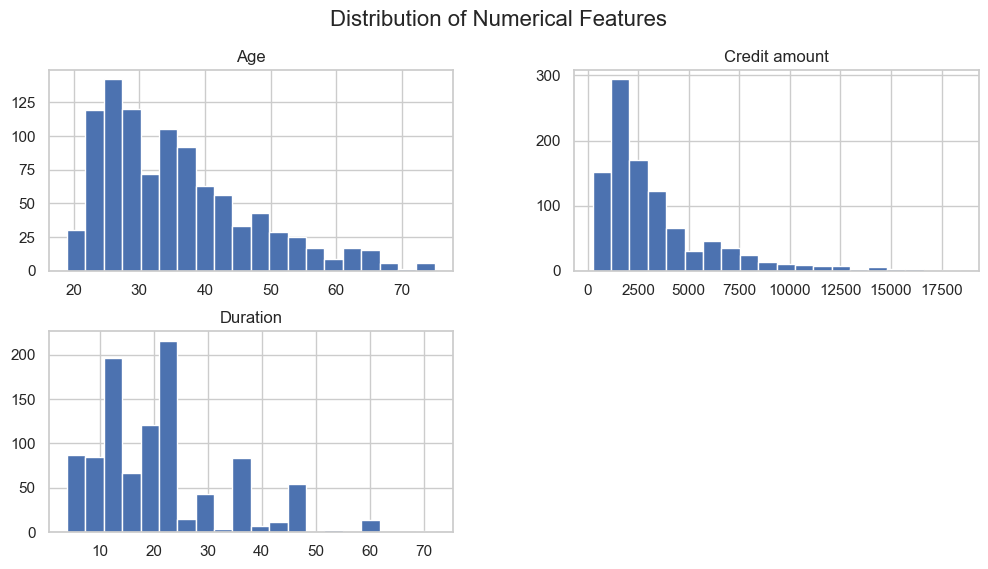

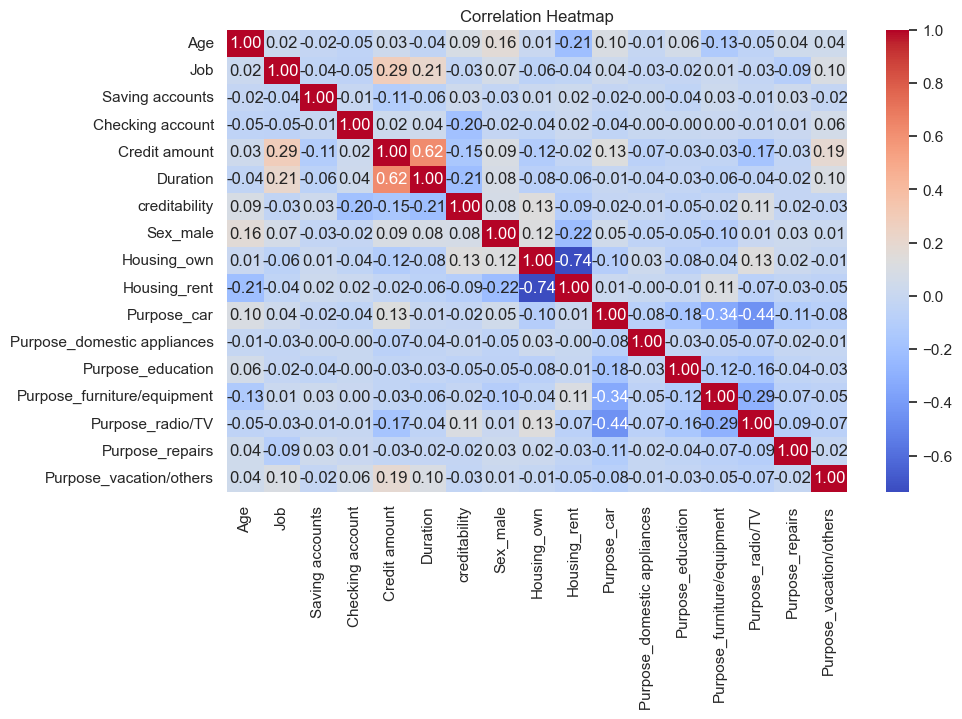

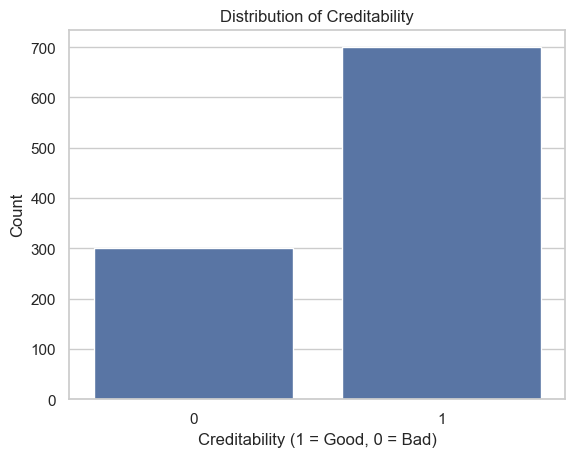

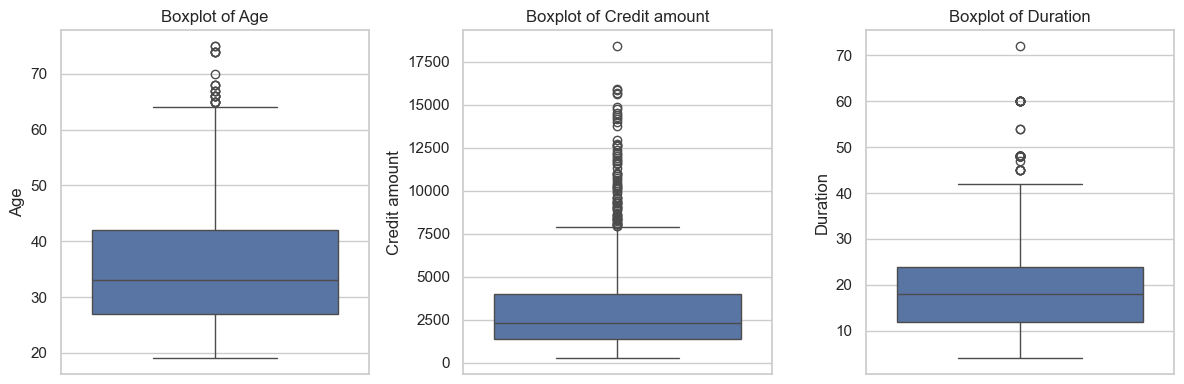

Skewness of Age: 1.02
Skewness of Credit amount: 1.95
Skewness of Duration: 1.09


In [7]:


sns.set(style="whitegrid")

numeric_cols = ['Age', 'Credit amount', 'Duration']
df[numeric_cols].hist(bins=20, figsize=(12, 6))
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

sns.countplot(x='creditability', data=df)
plt.title("Distribution of Creditability")
plt.xlabel("Creditability (1 = Good, 0 = Bad)")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(12, 4))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

for col in numeric_cols:
    sk = skew(df[col])
    print(f"Skewness of {col}: {sk:.2f}")

### Key takeaways:

1. Age, Credit Amount, and Duration are skewed. We can logtransform these to build a more accurate model.
2. Nothing in the correlation heat map has strong correlation except Duration and Credit amount. We can check for multicollinearity.
3. Other high correlations such as housing rent and housing own can be attributed to the fact that they are opposites to eachother and one_hot encoding. 



In [8]:
df['Credit amount_log'] = np.log1p(df['Credit amount'])
df['Duration_log'] = np.log1p(df['Duration'])
df['Age_log'] = np.log1p(df['Age'])

X = df[['Credit amount', 'Duration']] 
X = add_constant(X)  

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

         Feature       VIF
0          const  4.017128
1  Credit amount  1.640972
2       Duration  1.640972


The Variance inflation factor is in a fine range and now we are ready to proceed with building the model.

## Step 5: Build and Evaluate the models

We can start building the model since we have:

1. Cleaned the data
2. Explored the data
3. Checked for skewness and multicollinearity

### Implementation:

to evaluate the model, we split the data into 20% test data and 80% training data. It is important to stratify y since if one class is more common than the other it could lead to an imbalance. We want both our training and test data to both have the same ratio of good and bad credit cases.

### Types of models:

1. **Logistic Regression:** Linear model, good baseline
2. **Decision Tree:** Rule based model, non-linear model to contrast with logistic regression
3. **XGBoost:** Bagging model, reduces overfitting to contrast with the Decision tree


In [9]:
X = df.drop('creditability', axis = 1)
y = df['creditability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

print("Logistic Regression - Classification Report:\n", classification_report(y_test, y_pred_logreg))
print('-'*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))



Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.30      0.36        60
           1       0.74      0.84      0.79       140

    accuracy                           0.68       200
   macro avg       0.59      0.57      0.57       200
weighted avg       0.65      0.68      0.66       200

----------------------------------------------------------------------------------------------------
Confusion Matrix:
 [[ 18  42]
 [ 22 118]]


In [10]:

dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree - Classification Report:\n", classification_report(y_test, y_pred_dt))
print('-'*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree - Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.45      0.46        60
           1       0.77      0.78      0.77       140

    accuracy                           0.68       200
   macro avg       0.62      0.61      0.62       200
weighted avg       0.68      0.68      0.68       200

----------------------------------------------------------------------------------------------------
Confusion Matrix:
 [[ 27  33]
 [ 31 109]]


In [11]:

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost - Classification Report:\n", classification_report(y_test, y_pred_xgb))
print('-'*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

XGBoost - Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.52      0.53        60
           1       0.80      0.81      0.81       140

    accuracy                           0.72       200
   macro avg       0.67      0.67      0.67       200
weighted avg       0.72      0.72      0.72       200

----------------------------------------------------------------------------------------------------
Confusion Matrix:
 [[ 31  29]
 [ 26 114]]


### Evaluation Summary:

From the Classification report and the Confusion matrix a few things are apparent. 

1. XGBoost had the best overall model since it had the highest accuracy(0.72), and a good balance between precision, recall and F1-score
2. Logistic Regression and Decision Tree both have a lower accuracy(0.68) and lower precision, leading to many false positives and false negatives.
3. XGBoost still has room for improvement since it's precision for Class 0 was only 0.54. This means the model is good at classifiying good credit but not good at classifying bad credit.



# Conclusion

In this project the goal was to evaluate 3 different models with a dataset of credit in order to predict creditworthiness of loan applicants. After testing a Logistic Regression, Decision Tree, and XGBoost model here are the summary of the findings:

## Summary of findings:

1. **Model Performance:**

   
    * The XGBoost model performed the best, it had the best accuracy(0.72) as well as the best precision for both classes. Therefore the most reliable model to predict creditworthiness was the XGBoost model.
    * Logistic Regression and Decision Tree both performed poorly compared to the XGBoost model. They had lower accuracy and precision scores compared to XGBoost model

3. **Challenges:**

   
    * One of the main challenges with this project was that there was a significant imbalance between the amount of data for bad credit and good credit. Because of this all 3 models were worse at predicting bad credit compared to good credit.

4. **Future Improvements:**

   
    * In order to improve the accuracy and presicion of the XGBoost model we can make it more senitive to the bad credit cases by exploring different features and weighing the classes differently.

To conclude the best model for predicting the creditworthiness was the XGBoost model but further refinements could increase it's accuracy and precision, making it better ready to handle real world scenarios.
    
